Importing necessary libraries and required modules

In [3]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns
from sklearn.metrics import *
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Problem Statement:
In this project, initially preprocess the data and then develop an understanding
of different features of the data by performing exploratory analysis and creating visualizations. Further, after having sufficient knowledge about the attributes perform a predictive task of classification to predict whether an individual makes over 50K a year or less, by using different Machine Learning Algorithms.

In [ ]:
data=pd.read_csv('census-income.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.shape

(32561, 15)

Assigning name for the unnamed last column

In [ ]:
# data.columns.values[-1] = 'income'
data.rename(columns={data.columns[-1]: 'income'},inplace=True)

In [ ]:
data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       'income'],
      dtype='object')

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#Data Preprocessing
##a) Replace all the missing values with NA.

In [ ]:
data=data.fillna('NA')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.shape

(32561, 15)

##b) Remove all the rows that contain NA values.

In [ ]:
data=data.dropna()
data.shape

(32561, 15)

As shape of the dataset did not change after replacing and removing missing (NA) values, this indicates that the dataset did not contain any missing values

#Data Manipulation
##a) Extract the “education” column and store it in “census_ed” .

In [ ]:
census_ed=data[[' education']]
census_ed

,education
0,Bachelors
1,Bachelors
2,HS-grad
3,11th
4,Bachelors
...,...
32556,Assoc-acdm
32557,HS-grad
32558,HS-grad
32559,HS-grad


##b) Extract all the columns from “age” to “relationship” and store it in “census_seq”.

In [ ]:
census_seq=data.loc[:,'age':' relationship']
census_seq

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife
...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child


##c) Extract the column number “5”, “8”, “11” and store it in “census_col”.

In [ ]:
census_col=data.iloc[:,4:12:3]
census_col

,education-num,relationship,capital-gain
0,13,Not-in-family,2174
1,13,Husband,0
2,9,Not-in-family,0
3,7,Husband,0
4,13,Wife,0
...,...,...,...
32556,12,Wife,0
32557,9,Husband,0
32558,9,Unmarried,0
32559,9,Own-child,0


##d) Extract all the male employees who work in state-gov and store it in “male_gov”.

In [ ]:
male_gov=data[(data[' sex']==' Male')&(data[' workclass']==' State-gov')]
male_gov

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,<=50K
48,41,State-gov,101603,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
123,29,State-gov,267989,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32163,36,State-gov,135874,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
32241,45,State-gov,231013,Bachelors,13,Divorced,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32321,54,State-gov,138852,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
32324,42,State-gov,138162,Some-college,10,Divorced,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K


##e) Extract all the 39 year olds who either have a bachelor's degree or who are native of the United States and store the result in “census_us”.

In [ ]:
census_us=data[(data['age']==39)&((data[' education']==' Bachelors')|(data[' native-country']==' United-States'))]
census_us

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
129,39,Private,365739,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
166,39,Federal-gov,235485,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,42,United-States,<=50K
320,39,Self-emp-not-inc,174308,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32146,39,Private,117381,Some-college,10,Divorced,Transport-moving,Not-in-family,White,Male,0,0,65,United-States,<=50K
32260,39,Federal-gov,232036,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
32428,39,Federal-gov,110622,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K
32468,39,Self-emp-not-inc,193689,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,65,United-States,<=50K


##f) Extract 200 random rows from the “census” data frame and store it in “census_200”.

In [ ]:
sample_size=200
census_200=data.sample(sample_size,random_state=0)
census_200

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
22278,27,Private,177119,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States,<=50K
8950,27,Private,216481,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
7838,25,Private,256263,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
16505,46,Private,147640,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States,<=50K
19140,45,Private,172822,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27337,31,Private,227886,Some-college,10,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,35,United-States,<=50K
439,42,Local-gov,340148,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,<=50K
30929,23,Private,189468,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Own-child,White,Female,0,0,30,United-States,<=50K
29135,24,Private,142528,Some-college,10,Never-married,Sales,Own-child,White,Male,0,0,20,United-States,<=50K


##g) Get the count of different levels of the “workclass” column.

In [ ]:
data[' workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

##h) Calculate the mean of the “capital.gain” column grouped according to “workclass”.

In [ ]:
data[' capital-gain'].groupby(data[' workclass']).mean()

 workclass
 ?                    606.795752
 Federal-gov          833.232292
 Local-gov            880.202580
 Never-worked           0.000000
 Private              889.217792
 Self-emp-inc        4875.693548
 Self-emp-not-inc    1886.061787
 State-gov            701.699538
 Without-pay          487.857143
Name:  capital-gain, dtype: float64

##i) Create a separate dataframe with the details of males and females from the census data that has income more than 50,000.

In [ ]:
high_income_census=data[data['income']==' >50K']
high_income_census

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


##j) Calculate the percentage of people from the United States who are private employees and earn less than 50,000 annually.

In [ ]:
pvt_us_lowIncome_census=data[(data[' native-country']==' United-States')&(data[' workclass']==' Private')&(data['income']==' <=50K')]
pvt_us_lowIncome_census

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
data_len=len(data)
pvt_len=len(pvt_us_lowIncome_census)
print('Length of original entire dataset:',data_len,'\nLength of filtered dataset:',pvt_len)

Length of original entire dataset: 32561 
Length of filtered dataset: 15594


In [ ]:
pvt_perc=(pvt_len/data_len)*100
print('People from the United States who are private employees and earn less than 50,000 annually constitute for',pvt_perc,'% of the total census')

People from the United States who are private employees and earn less than 50,000 annually constitute for 47.891649519363654 % of the total census


##k) Calculate the percentage of married people in the census data.

In [ ]:
data[' marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  marital-status, dtype: int64

In [ ]:
married_census=data[(data[' marital-status']!=' Never-married')&(data[' marital-status']!=' Divorced')&(data[' marital-status']!=' Widowed')]
married_census

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [ ]:
mar_len=len(married_census)
mar_perc=(mar_len/data_len)*100
print('Percentage of married people among total census is',mar_perc,'% of the total census')

Percentage of married people among total census is 50.4959921378336 % of the total census


##l) Calculate the percentage of high school graduates earning more than 50,000 annually.

In [ ]:
hsg_census=data[(data[' education']==' HS-grad')&(data['income']==' >50K')]
hsg_census

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
67,53,Private,169846,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
84,44,Private,343591,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,14344,0,40,United-States,>50K
86,49,Local-gov,268234,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
105,32,Self-emp-inc,317660,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7688,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,48,Self-emp-inc,185041,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,50,United-States,>50K
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K
32518,57,Local-gov,110417,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [ ]:
hsg_len=len(hsg_census)
hsg_perc=(hsg_len/data_len)*100
print('High school graduates earning more than 50,000 form',hsg_perc,'% of the total census')

High school graduates earning more than 50,000 form 5.144190903227788 % of the total census


#Linear Regression

##Build a simple linear regression model as follows:
● Dependent variable is “hours.per.week” and the independent variable is “education.num”.

In [ ]:
x=data[[' education-num']]
y=data[[' hours-per-week']]

● Divide the dataset into training and test sets in 70:30 ratio.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=18)

● Build a linear model on the test set

In [ ]:
l_model=LinearRegression()      #building the model
l_model.fit(x_test,y_test)      #training the model

LinearRegression()

● Predict the values on the train set and find the error in prediction.


In [ ]:
predictions = l_model.predict(x_train)
predictions

array([[40.36108384],
       [38.2226841 ],
       [38.93548402],
       ...,
       [40.36108384],
       [41.78668367],
       [42.49948358]])

In [ ]:
error_pred=pd.DataFrame(columns=['Actual_data','Predicted_data'])
error_pred['Actual_data']=y_train
error_pred['Predicted_data']=predictions
error_pred['Error']=error_pred['Actual_data']-error_pred['Predicted_data']
error_pred

,Actual_data,Predicted_data,Error
11709,40,40.361084,-0.361084
8291,20,38.222684,-18.222684
22253,16,38.935484,-22.935484
14000,60,39.648284,20.351716
19498,40,37.509884,2.490116
...,...,...,...
1726,40,39.648284,0.351716
2885,40,39.648284,0.351716
25720,40,40.361084,-0.361084
28947,45,41.786684,3.213316


● Find the root-mean-square error (RMSE).

In [ ]:
lr_rmse=np.sqrt(mean_squared_error(y_train,predictions))
lr_rmse

12.165319909199068

#Logistic Regression
##Build a simple logistic regression model as follows:
● Dependent variable is “X”(yearly income) and the independent variable is “occupation”

In [ ]:
le=LabelEncoder()

Performing Label Encoding to convert the object datatype column to numeric type

In [ ]:
x=data[[' occupation']]
y=data[['income']]

In [ ]:
x=pd.DataFrame(le.fit_transform(x))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


● Divide the dataset into training and test sets in 65:35 ratio.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=18)

● Build a logistic regression model

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

● Predict the values on the test set.

In [ ]:
predictions = lr.predict(x_test)
predictions

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

● Build a confusion matrix and find the accuracy.

In [ ]:
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('\nAccuracy =',accuracy_score(y_test,predictions))

Confusion matrix:
 [[8641    0]
 [2756    0]]

Accuracy = 0.7581819777134333


##Build a multiple logistic regression model as follows:
● Dependent variable is “X”(yearly income) and independent variables are “age”, “workclass”, and “education”.

In [ ]:
x=data[['age',' workclass',' education']]
y=data[['income']]

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         32561 non-null  int64 
 1    workclass  32561 non-null  object
 2    education  32561 non-null  object
dtypes: int64(1), object(2)
memory usage: 763.3+ KB


Converting object type columns to numeric by label encoding

In [ ]:
for i in x.columns:
    if x[i].dtype=='object':
        x[i]=le.fit_transform(x[i])

<ipython-input-97-fb9d0f7237af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i]=le.fit_transform(x[i])
<ipython-input-97-fb9d0f7237af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i]=le.fit_transform(x[i])


● Divide the dataset into training and test sets in 80:20 ratio

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=18)

● Build a logistic regression model

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

● Predict the values on the test set.

In [ ]:
predictions = lr.predict(x_test)
predictions

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

● Build a confusion matrix and find the accuracy.

In [ ]:
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('\nAccuracy =',accuracy_score(y_test,predictions))

Confusion matrix:
 [[4834  117]
 [1525   37]]

Accuracy = 0.747888837709197


#Decision Tree
##Build a decision tree model as follows:
● Dependent variable is “X”(Yearly Income)
and the rest of the variables as independent variables.

In [ ]:
x=data.drop('income',axis=1)
y=data[['income']]

Converting all object type columns to numeric by label encoding

In [ ]:
for i in x.columns:
    if x[i].dtype=='object':
        x[i]=le.fit_transform(x[i])

● Divide the dataset into training and test sets in 70:30 ratio.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=18)

● Build a decision tree model

In [ ]:
clf=tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

● Predict the values on the test set.

In [ ]:
predictions=clf.predict(x_test)
predictions

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

● Build a confusion matrix and calculate the accuracy.

In [ ]:
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('\nAccuracy =',accuracy_score(y_test,predictions))

Confusion matrix:
 [[6419  980]
 [ 874 1496]]

Accuracy = 0.8102159893540792


#Random Forest
##Build a random forest model as follows:

● Dependent variable is “X”(Yearly Income) and the rest of the variables as independent variables

In [ ]:
x=data.drop('income',axis=1)
y=data[['income']]

Converting object type columns to numeric by label encoding

In [ ]:
for i in x.columns:
    if x[i].dtype=='object':
        x[i]=le.fit_transform(x[i])

● Divide the dataset into training and test sets in 80:20 ratio.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=18)


● Build a random forest model where the  and number of trees as 300.

In [ ]:
rfc=RandomForestClassifier(n_estimators=300)
rfc.fit(x_train,y_train)

<ipython-input-117-3f6cfaf34a30>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(n_estimators=300)

● Predict values on the test set

In [ ]:
predictions=rfc.predict(x_test)
predictions

array([' >50K', ' <=50K', ' >50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype=object)

● Build a confusion matrix and calculate the accuracy

In [ ]:
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('\nAccuracy =',accuracy_score(y_test,predictions))

Confusion matrix:
 [[4621  330]
 [ 585  977]]

Accuracy = 0.8595117457392907


From all of above fitted models - Linear Regression, Logistic Regression, Decision Tree, Random Forest; Random Forest results in giving the best accuracy score for the given dataset which is close to 86%

#Time Series Forecasting
##Using the population dataset, and perform the following:
1. EDA on the time series to find trends and seasonality

In [4]:
df=pd.read_csv('popdata.csv')
df.head()

,value,date
0,127299.0,1952-01-01
1,127517.0,1952-02-01
2,127721.0,1952-03-01
3,127933.0,1952-04-01
4,128130.0,1952-05-01


Convert object column to datetime as time series cannot handle object datatype. Setting date column to index

In [5]:
df['date']=pd.to_datetime(df['date'])
df.index=df['date']
del df['date']
df.head()

,value
date,
1952-01-01,127299.0
1952-02-01,127517.0
1952-03-01,127721.0
1952-04-01,127933.0
1952-05-01,128130.0


Plotting the Time series can help in analyzing the visible trends, seasonality in the data. Use visualization library to create simple line plots to study the data.

<Axes: xlabel='date'>

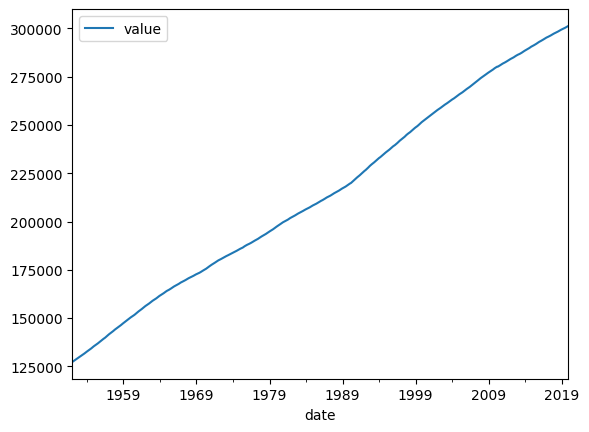

In [6]:
df.plot()

From the plot drawn in the previous section, clearly there is a certain pattern. There is a upward trend in the data with seasonality. To understand this, take a look at various patterns to identify from time series plots.

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

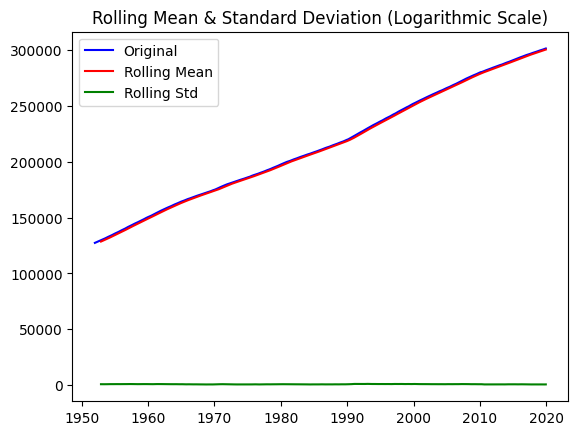

In [7]:
mean_log=df.rolling(window=12).mean()
std_log=df.rolling(window=12).std()

plt.plot(df,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='green',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

The rolling mean and standard deviation on the original time series data shows a constant increase in the mean.

To find the stationarity in a data, use the statistical Adfuller test.

Consider two hypotheses, a null hypotheses and an alternate hypotheses. If the null hypotheses is rejected after the computation, the time series is stationary series.

To reject the null hypotheses, the following must be true:

1. If the p-value after the adfuller test is greater than 0.05, the hypotheses cannot be rejected.
2. If the p-value is less than 0.05, the null hypotheses can be rejected and it can be assumed that the time series is stationary.


In [8]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['value'])
result

(-0.6653174109473092,
 0.8555297779110256,
 17,
 798,
 {'1%': -3.4385711275998583,
  '5%': -2.8651686574447375,
  '10%': -2.568702230639255},
 6593.486797606457)

The p-value from the result is on the index 1, and it can be checked if the data is stationary or not. In this case, the p-value = 0.8555 which is more than 0.05 and thus, the null hypotheses cannot be rejected and it can be assumed that the data is non-stationary.

Using the log transformation here to make the time series stationary

<Axes: xlabel='date'>

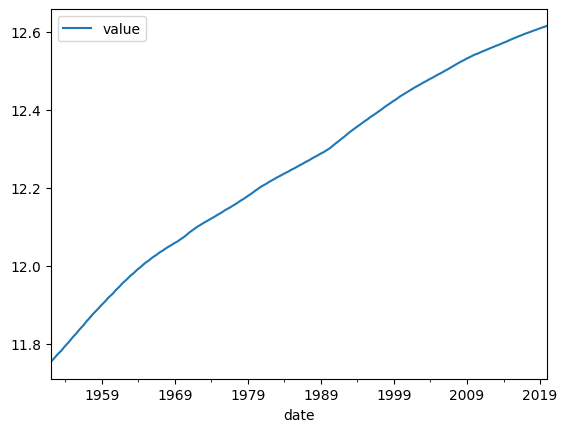

In [9]:
first_log=np.log(df)
first_log=first_log.dropna()
first_log.plot()

Plotting the rolling standard deviation, and rolling mean on the log transformed data

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

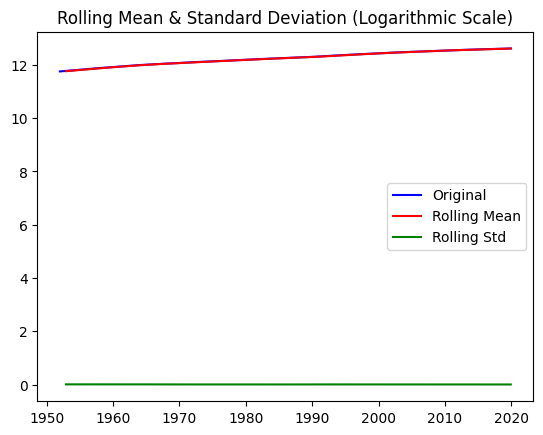

In [10]:
mean_log=first_log.rolling(window=12).mean()
std_log=first_log.rolling(window=12).std()

plt.plot(first_log,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='green',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

From the plot, it is evident that the time series is improved a little in terms of mean and standard deviation

Creating a new time series by subtracting the rolling mean with the log transformed time series.

In [11]:
new_data=first_log-mean_log
new_data=new_data.dropna()
new_data.head()

,value
date,
1952-12-01,0.009811
1953-01-01,0.009748
1953-02-01,0.009553
1953-03-01,0.009237
1953-04-01,0.009139


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithm Scale)')

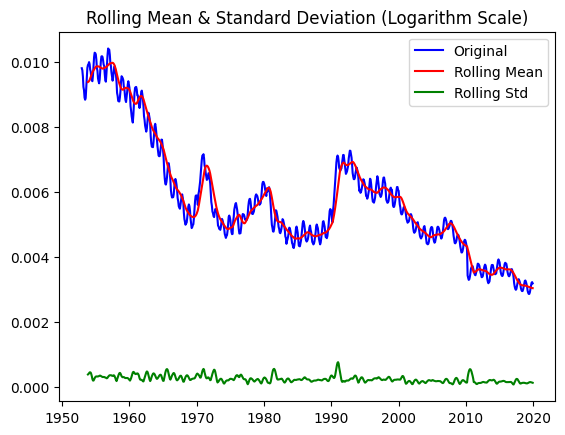

In [12]:
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

plt.plot(new_data,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='green',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithm Scale)')

After plotting the new rolling mean and standard deviation, it is observed that the mean and standard deviation is slightly improved but they still don't lie in the same plane

Perform Adfuller test on the new detrended time series to check the stationarity of the time series.

In [13]:
result=adfuller(new_data['value'])
result

(-1.873742184120182,
 0.3445126240647211,
 17,
 787,
 {'1%': -3.438686413400388,
  '5%': -2.8652194721349424,
  '10%': -2.5687293001910008},
 -12895.296210615545)

It is confirmed that the data is not yet stationary after performing the Adfuller test again as p-value is still greater than 5%

Using the log transformation step once more in attempt to make the time series stationary

<Axes: xlabel='date'>

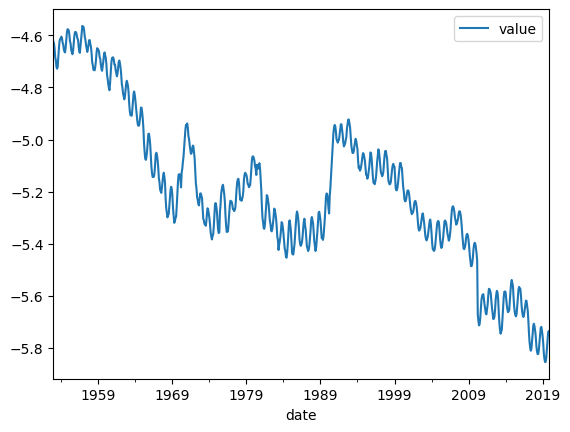

In [14]:
second_log=np.log(new_data)
second_log=second_log.dropna()
second_log.plot()

Plotting the new rolling standard deviation, new and rolling mean on the second time log transformed data

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

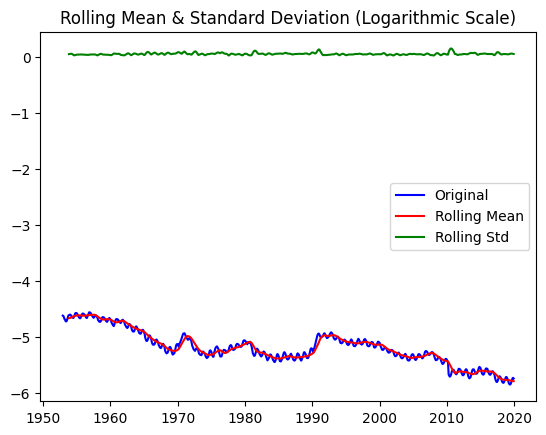

In [15]:
mean_log=second_log.rolling(window=12).mean()
std_log=second_log.rolling(window=12).std()

plt.plot(second_log,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='green',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [16]:
new_data=second_log-mean_log
new_data=new_data.dropna()
new_data.head()

,value
date,
1953-11-01,0.055202
1953-12-01,0.056604
1954-01-01,0.060882
1954-02-01,0.051065
1954-03-01,0.029965


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithm Scale)')

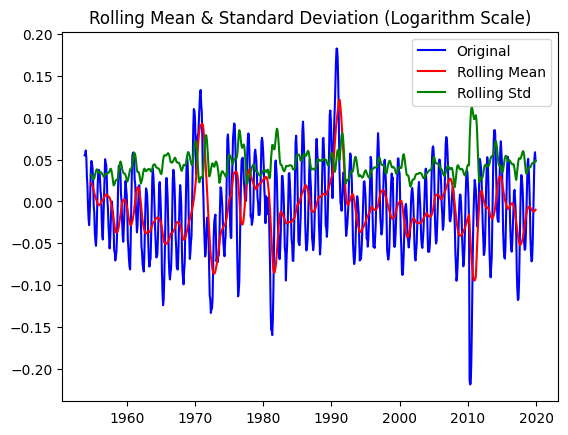

In [17]:
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

plt.plot(new_data,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='green',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithm Scale)')

After plotting the latest rolling mean and standard deviation, it is observed that the mean and standard deviation is greatly improved as they all lie in the same plane

Perform Adfuller test on the new detrended time series to cross-check the stationarity of the time series.

In [18]:
result=adfuller(new_data['value'])
result

(-4.334491254588878,
 0.0003869315489247655,
 18,
 775,
 {'1%': -3.4388159246521433,
  '5%': -2.865276554696385,
  '10%': -2.5687597090530696},
 -4671.760600274254)

The p-value from the result is finally less than 0.05, therefore now the null hypotheses can be rejected and the time series can be considered to be stationary

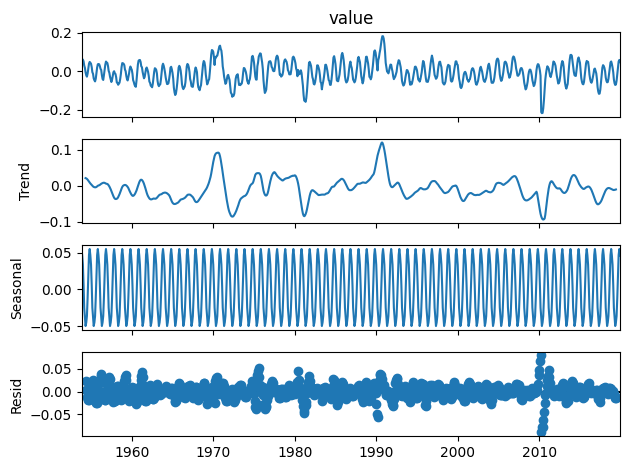

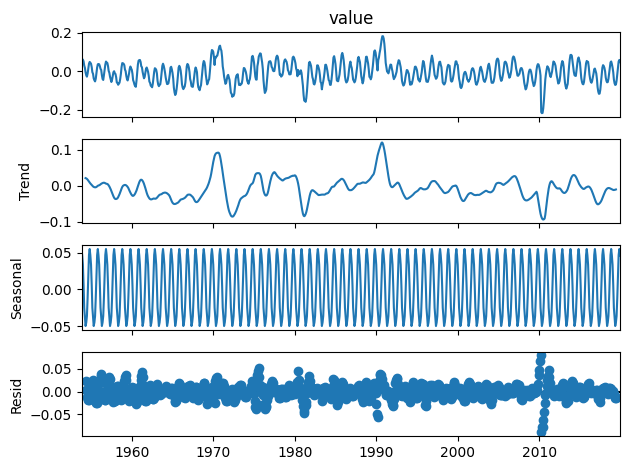

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result=seasonal_decompose(new_data['value'].dropna())
decompose_result.plot()

In [20]:
new_data.shape

(794, 1)

In [21]:
from statsmodels.tsa.arima.model import ARIMA

train=new_data.iloc[:770]['value']
test=new_data[771:]['value']

model=ARIMA(train,order=(1,2,2))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  770
Model:                 ARIMA(1, 2, 2)   Log Likelihood                2042.862
Date:                Sat, 13 Jan 2024   AIC                          -4077.724
Time:                        05:45:42   BIC                          -4059.149
Sample:                    11-01-1953   HQIC                         -4070.575
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6350      0.053     11.952      0.000       0.531       0.739
ma.L1         -0.8993      0.234     -3.849      0.000      -1.357      -0.441
ma.L2         -0.1003      0.062     -1.630      0.103      -0.221       0.020
sigma2         0.0003    5.8e-05      4.908      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):             10840.20
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               1.58   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='date'>

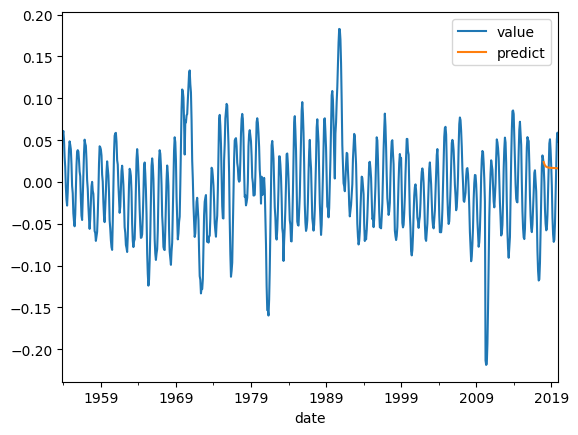

In [22]:
new_data['predict']=model_fit.predict(start=len(train),
                    end=len(train)+len(test)-1,
                    dynamic=True)
new_data[['value','predict']].plot()

As shown in above graph, the predictions are way off the actual values from the test set. Therefore, seasonal ARIMA model can be tried for forecasting

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults
model=SARIMAX(train,order=(1,0,2),seasonal_order=(1,0,2,12))
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='date'>

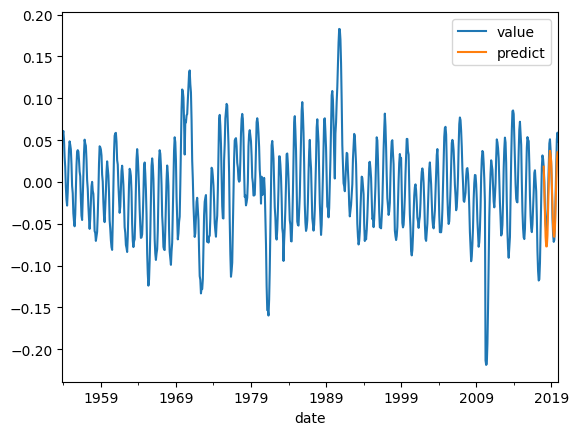

In [24]:
new_data['predict']=model.predict(start=len(train),
                    end=len(train)+len(test)-1,
                    dynamic=True)
new_data[['value','predict']].plot()

Here, the predicted values on the test set are more accurate than the ARIMA model. Therefore a Time series forecast model is successfully created. Now use this model to forecast the time series.

2. Forecast the population on the given dataset for the next 6 months

<Axes: xlabel='date'>

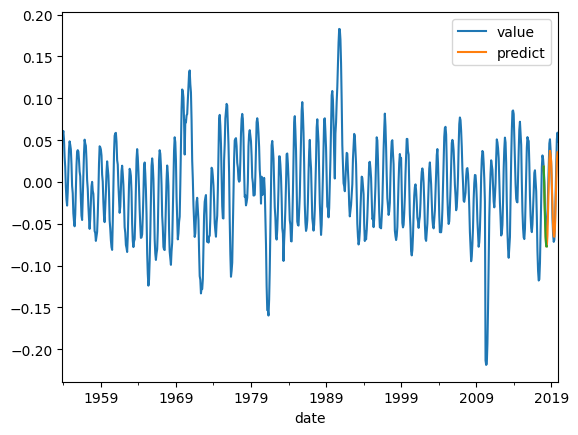

In [25]:
forecast=model.forecast(steps=6)
new_data.plot()
forecast.plot()

Here forecasting for upcoming 6 months is sucessfully predicted as well as visualized